In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import tensorflow as tf
from tensorflow import keras

In [3]:
file_path_new = 'C:/Users/USER/Desktop/heart+disease/reprocessed.hungarian.data'

column_names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 
                'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']

df = pd.read_csv(file_path_new, names=column_names, sep=' ', header=None)

df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,40.0,1.0,2.0,140.0,289.0,0.0,0.0,172.0,0.0,0.0,-9.0,-9.0,-9.0,0.0
1,49.0,0.0,3.0,160.0,180.0,0.0,0.0,156.0,0.0,1.0,2.0,-9.0,-9.0,1.0
2,37.0,1.0,2.0,130.0,283.0,0.0,1.0,98.0,0.0,0.0,-9.0,-9.0,-9.0,0.0
3,48.0,0.0,4.0,138.0,214.0,0.0,0.0,108.0,1.0,1.5,2.0,-9.0,-9.0,3.0
4,54.0,1.0,3.0,150.0,-9.0,0.0,0.0,122.0,0.0,0.0,-9.0,-9.0,-9.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290,36.0,1.0,2.0,120.0,166.0,0.0,0.0,180.0,0.0,0.0,-9.0,-9.0,-9.0,0.0
291,48.0,1.0,3.0,110.0,211.0,0.0,0.0,138.0,0.0,0.0,-9.0,-9.0,6.0,0.0
292,47.0,0.0,2.0,140.0,257.0,0.0,0.0,135.0,0.0,1.0,1.0,-9.0,-9.0,0.0
293,53.0,1.0,4.0,130.0,182.0,0.0,0.0,148.0,0.0,0.0,-9.0,-9.0,-9.0,0.0


In [4]:
#결측치

df.isna().sum().to_numpy()

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [5]:
#결측치 제거

cleaned_df = df.dropna()
cleaned_df.isna().sum().to_numpy()

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [6]:
cleaned_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,40.0,1.0,2.0,140.0,289.0,0.0,0.0,172.0,0.0,0.0,-9.0,-9.0,-9.0,0.0
1,49.0,0.0,3.0,160.0,180.0,0.0,0.0,156.0,0.0,1.0,2.0,-9.0,-9.0,1.0
2,37.0,1.0,2.0,130.0,283.0,0.0,1.0,98.0,0.0,0.0,-9.0,-9.0,-9.0,0.0
3,48.0,0.0,4.0,138.0,214.0,0.0,0.0,108.0,1.0,1.5,2.0,-9.0,-9.0,3.0
4,54.0,1.0,3.0,150.0,-9.0,0.0,0.0,122.0,0.0,0.0,-9.0,-9.0,-9.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,48.0,0.0,2.0,-9.0,308.0,0.0,1.0,-9.0,-9.0,2.0,1.0,-9.0,-9.0,0.0
290,36.0,1.0,2.0,120.0,166.0,0.0,0.0,180.0,0.0,0.0,-9.0,-9.0,-9.0,0.0
291,48.0,1.0,3.0,110.0,211.0,0.0,0.0,138.0,0.0,0.0,-9.0,-9.0,6.0,0.0
292,47.0,0.0,2.0,140.0,257.0,0.0,0.0,135.0,0.0,1.0,1.0,-9.0,-9.0,0.0


In [7]:
cleaned_df['num'].value_counts()

num
0.0    188
1.0     37
3.0     28
2.0     26
4.0     15
Name: count, dtype: int64

Text(0.5, 1.0, 'Label')

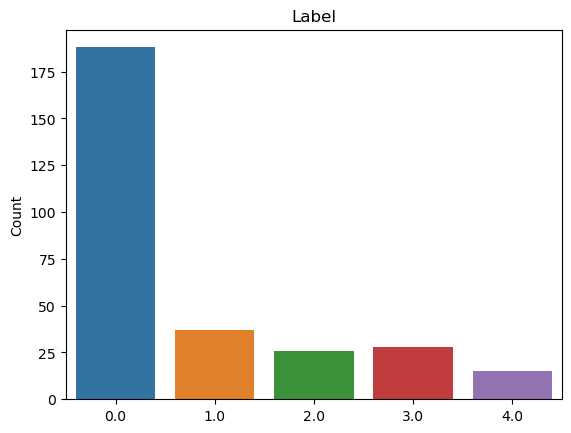

In [8]:
#Label 별 개수

sns.countplot(data = cleaned_df, x="num")
plt.xlabel("")
plt.ylabel("Count")
plt.title("Label")

In [9]:
# 각 클래스별로 5000개씩 데이터 추출
sampled_df = pd.DataFrame()  # 추출된 데이터를 저장할 빈 DataFrame 생성
classes = cleaned_df['num'].unique()  # 'Label' 열의 고유값을 추출하여 클래스 목록 생성

for cls in classes:
    class_df = cleaned_df[cleaned_df['num'] == cls]  # 현재 클래스에 해당하는 데이터만 필터링
    sampled_class_df = class_df.sample(n=150, replace=True)  # 클래스 데이터에서 5000개 샘플 추출, replace=True는 데이터가 5000개 미만일 때 중복 허용
    sampled_df = pd.concat([sampled_df, sampled_class_df], ignore_index=True)  # 추출된 데이터를 sampled_df에 추가
sampled_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,40.0,1.0,3.0,130.0,215.0,0.0,0.0,138.0,0.0,0.0,-9.0,-9.0,-9.0,0.0
1,48.0,1.0,2.0,100.0,-9.0,0.0,0.0,100.0,0.0,0.0,-9.0,-9.0,-9.0,0.0
2,39.0,1.0,4.0,110.0,273.0,0.0,0.0,132.0,0.0,0.0,-9.0,-9.0,-9.0,0.0
3,50.0,1.0,4.0,140.0,129.0,0.0,0.0,135.0,0.0,0.0,-9.0,-9.0,-9.0,0.0
4,47.0,1.0,1.0,110.0,249.0,0.0,0.0,150.0,0.0,0.0,-9.0,-9.0,-9.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,50.0,1.0,4.0,130.0,233.0,0.0,0.0,121.0,1.0,2.0,2.0,-9.0,7.0,2.0
746,46.0,1.0,4.0,120.0,231.0,0.0,0.0,115.0,1.0,0.0,-9.0,-9.0,-9.0,2.0
747,48.0,1.0,4.0,122.0,275.0,1.0,1.0,150.0,1.0,2.0,3.0,-9.0,-9.0,2.0
748,54.0,1.0,4.0,130.0,603.0,1.0,0.0,125.0,1.0,1.0,2.0,-9.0,-9.0,2.0


In [10]:
sampled_df['num'].value_counts()

num
0.0    150
1.0    150
3.0    150
4.0    150
2.0    150
Name: count, dtype: int64

In [11]:
X = sampled_df.drop(['num'], axis=1)
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,40.0,1.0,3.0,130.0,215.0,0.0,0.0,138.0,0.0,0.0,-9.0,-9.0,-9.0
1,48.0,1.0,2.0,100.0,-9.0,0.0,0.0,100.0,0.0,0.0,-9.0,-9.0,-9.0
2,39.0,1.0,4.0,110.0,273.0,0.0,0.0,132.0,0.0,0.0,-9.0,-9.0,-9.0
3,50.0,1.0,4.0,140.0,129.0,0.0,0.0,135.0,0.0,0.0,-9.0,-9.0,-9.0
4,47.0,1.0,1.0,110.0,249.0,0.0,0.0,150.0,0.0,0.0,-9.0,-9.0,-9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,50.0,1.0,4.0,130.0,233.0,0.0,0.0,121.0,1.0,2.0,2.0,-9.0,7.0
746,46.0,1.0,4.0,120.0,231.0,0.0,0.0,115.0,1.0,0.0,-9.0,-9.0,-9.0
747,48.0,1.0,4.0,122.0,275.0,1.0,1.0,150.0,1.0,2.0,3.0,-9.0,-9.0
748,54.0,1.0,4.0,130.0,603.0,1.0,0.0,125.0,1.0,1.0,2.0,-9.0,-9.0


Text(0.5, 1.0, 'Label')

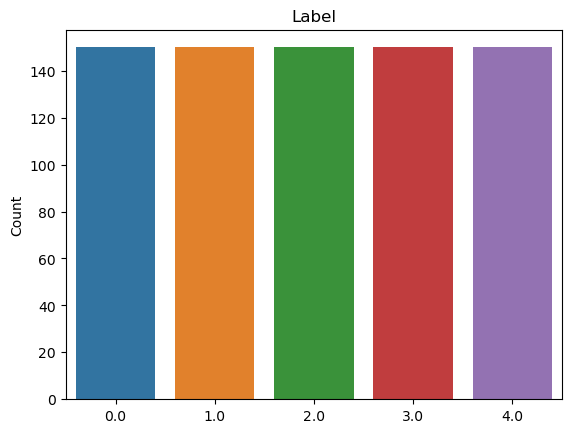

In [12]:
#Label 별 개수

sns.countplot(data = sampled_df, x="num")
plt.xlabel("")
plt.ylabel("Count")
plt.title("Label")

In [13]:
y = sampled_df['num']
y.value_counts()

num
0.0    150
1.0    150
3.0    150
4.0    150
2.0    150
Name: count, dtype: int64

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.2, random_state = 23)
X_train = X_train.values
X_test = X_test.values
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((600, 13), (150, 13), (600,), (150,))

In [15]:
y_train_onehot = pd.get_dummies(y_train).values
y_test_onehot = pd.get_dummies(y_test).values

In [16]:
print(X_train.shape)
print(X_test.shape)
print(y_train_onehot.shape)
print(y_test_onehot.shape)

(600, 13)
(150, 13)
(600, 5)
(150, 5)


In [17]:
#데이터셋을 3차원으로 변환

X_train = X_train.reshape(len(X_train), X_train.shape[1], 1)
X_test = X_test.reshape(len(X_test), X_test.shape[1], 1)
X_train.shape, X_test.shape

((600, 13, 1), (150, 13, 1))

In [18]:
from tensorflow.keras.layers import Conv1D, LSTM, Dropout, MaxPooling1D
from tensorflow.keras.layers import Input, Reshape
from keras.layers import Dense, Flatten, Dropout

In [21]:
input_layer = Input(shape=(13, 1))

conv1 = Conv1D(filters=32, kernel_size=6, padding = 'same', activation='relu')(input_layer)
conv2 = Conv1D(filters=48, kernel_size=6, padding = 'same', activation='relu')(conv1)
flatten = Flatten()(conv2)
dens1 = Dense(32, activation = "relu")(flatten)
outputs = Dense(5, activation = "softmax")(dens1)

model = keras.Model(input_layer, outputs)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 13, 1)]           0         
                                                                 
 conv1d_2 (Conv1D)           (None, 13, 32)            224       
                                                                 
 conv1d_3 (Conv1D)           (None, 13, 48)            9264      
                                                                 
 flatten (Flatten)           (None, 624)               0         
                                                                 
 dense_2 (Dense)             (None, 32)                20000     
                                                                 
 dense_3 (Dense)             (None, 5)                 165       
                                                                 
Total params: 29653 (115.83 KB)
Trainable params: 29653 (11

In [22]:
train_epochs = 100
history = model.fit(X_train, y_train_onehot, epochs=train_epochs, validation_data = (X_test, y_test_onehot))

Epoch 1/100


19/19 [==============================] - 4s 39ms/step - loss: 5.1231 - accuracy: 0.2400 - val_loss: 3.8264 - val_accuracy: 0.1933
Epoch 2/100
19/19 [==============================] - 0s 11ms/step - loss: 2.2239 - accuracy: 0.2917 - val_loss: 1.6608 - val_accuracy: 0.3733
Epoch 3/100
19/19 [==============================] - 0s 12ms/step - loss: 1.6726 - accuracy: 0.3283 - val_loss: 1.8848 - val_accuracy: 0.3133
Epoch 4/100
19/19 [==============================] - 0s 12ms/step - loss: 1.8792 - accuracy: 0.3117 - val_loss: 1.5001 - val_accuracy: 0.3533
Epoch 5/100
19/19 [==============================] - 0s 12ms/step - loss: 1.4140 - accuracy: 0.3817 - val_loss: 1.3250 - val_accuracy: 0.3800
Epoch 6/100
19/19 [==============================] - 0s 12ms/step - loss: 1.4136 - accuracy: 0.3750 - val_loss: 1.4479 - val_accuracy: 0.4067
Epoch 7/100
19/19 [==============================] - 0s 13ms/step - loss: 1.4042 - accuracy: 0.3983 - val_loss: 1.4497 - val_accuracy: 0.3733
Epoc

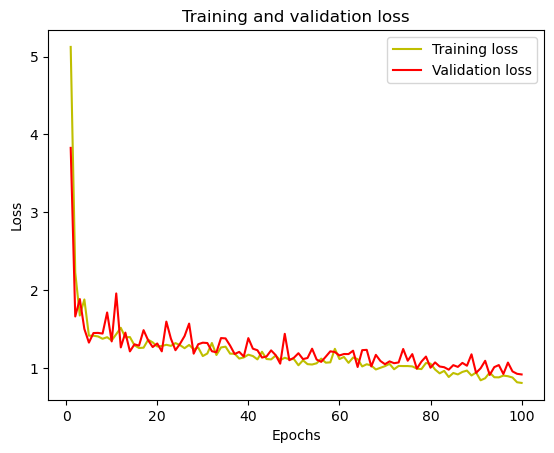

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

loss =history.history['loss']
val_loss =history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

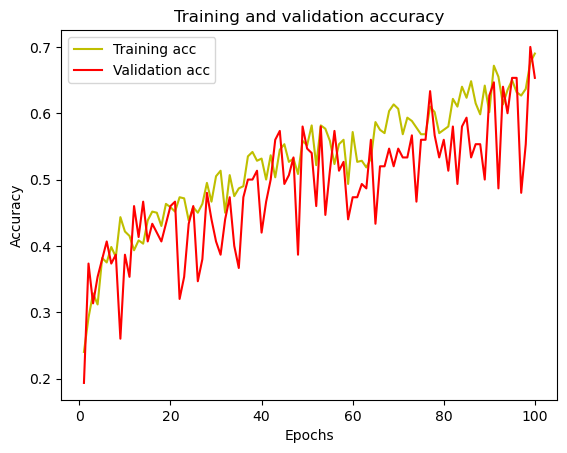

In [24]:
acc =history.history['accuracy']
val_acc =history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [25]:
from sklearn.metrics import classification_report,confusion_matrix


y_pred = model.predict(X_test)
y_test_class = np.argmax(y_test_onehot,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

5/5 [==============================] - 0s 5ms/step


In [26]:
#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       0.71      0.47      0.57        32
           1       0.55      0.55      0.55        33
           2       0.76      0.65      0.70        20
           3       0.65      0.74      0.69        35
           4       0.67      0.87      0.75        30

    accuracy                           0.65       150
   macro avg       0.67      0.65      0.65       150
weighted avg       0.66      0.65      0.65       150

[[15 12  2  2  1]
 [ 4 18  1  3  7]
 [ 2  0 13  5  0]
 [ 0  3  1 26  5]
 [ 0  0  0  4 26]]
